

#**TEXT GENERATION USING LSTM AND CALCULATING N-GRAM PROBABLITIES AND PERPLEXITY BEFORE AND AFTER SMOOTHING**


*link for the corpus used*: https://www.gutenberg.org/ebooks/11



#N-GRAM PROBABLITIES AND PERPLEXITY BEFORE AND AFTER SMOOTHING.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import re
import tensorflow as tf

##Reading the file and preprocessing the text

note: abcdef and fedcba are used as sentence initiator and terminator respectively

In [ ]:
f = open("Alice.txt",'r')  
data = f.read()

In [ ]:
tokenizer = Tokenizer()
corpus = data.lower().split(".")
for i in range(0,len(corpus)):
  s = re.sub(' +',' ',(re.sub(r'[^\w]', ' ', corpus[i])))
  corpus[i] = "abcdef " + s + " fedcba"   
print(len(corpus))
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1





1223


#CALCULATING NGRAM PROBABLITIES:

Given a list of n-grams(unigram or bigram or trigram) we can count the number of occurrences of each n-gram, this count determines the frequency with which an n-gram occurs throughout our document and thus using this we can find the probablity of the sentence.

#SMOOTHING

Laplace smoothing is a smoothing technique that helps tackle the problem of zero probability. This is done by adding "K" to the numerator and "KV" to the denominator, where K is any random number and V is the total number of unique n-grams in the dataset . In this case we take K = 1.

We find probablities with and without smoothing.

#PERPLEXITY

Perplexity is a measurement of how well a probability distribution or probability model predicts a sample. It may be used to compare probability models. A low perplexity indicates the probability distribution is good at predicting the sample.




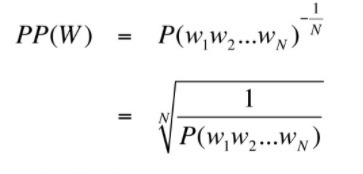

*WE CALCULATE N-GRAM(UNIGRAM, BIGRAM, TRIGRAM) PROBABLITIES WITH AND WITHOUT SMOOTHING, THEN FIND PERPLEXITY IN BOTH THE CASES FOR EACH N-GRAM.*





#UNIGRAM

A 1-gram (or unigram) is a one-word sequence. For the above sentence, the unigrams would simply be: “I”, “love”, “reading”, “blogs”, “about”, “data”, “science”.



Finding all unigrams from the document and pre-processing it.

In [ ]:
unigram = []
uunigram = 0
for j in corpus:
 token_list = tokenizer.texts_to_sequences([j])[0]
 for i in range(0,len(token_list)):
  n_gram_sequence = token_list[i:i+1]
  if (unigram.count(n_gram_sequence) == 0):
    uunigram = uunigram + 1
  unigram.append(n_gram_sequence)

**WITHOUT SMOOTHING**

The formula for finding unigram probablity **without smoothing** is as shown below.

image.png

In [ ]:
seed = "we indeed cried the mouse who was trembling down to the end of his tail"
seed = seed.lower()
seed = "abcdef " + seed + " fedcba"
seed_list = tokenizer.texts_to_sequences([seed])[0]
prob = 1
for i in seed_list:
  prob = prob*(unigram.count([i])/len(unigram))
print('UNIGRAM PROBABLITY WITHOUT SMOOTHING:',prob)
perp = (1/prob)**(1/(len(seed_list)-2))
print('PERPLEXITY:',perp)

UNIGRAM PROBABLITY WITHOUT SMOOTHING: 5.569529489002708e-42
PERPLEXITY: 562.7023982753366


**WITH SMOOTHING**

The formula for finding unigram probablity **with smoothing** is as shown below.

image.png

In [ ]:
seed = "Praveen indeed cried the mouse who was trembling down to the end of his tail"
seed = seed.lower()
seed = "abcdef " + seed + " fedcba"
seed = seed.split(" ")
seed_list = []
for i in seed:
  if (len(tokenizer.texts_to_sequences([i])[0]) == 0):
    seed_list.append(10000)
  else:
    seed_list.append(tokenizer.texts_to_sequences([i])[0][0])
prob = 1
for i in seed_list:
  if (i == 10000):
    prob = prob*(1/(len(unigram)+ uunigram))
  else:
    prob = prob*((unigram.count([i])+1)/(len(unigram)+uunigram))
print('UNIIGRAM PROBABLITY WITH SMOOTHING:',prob)
perp = (1/prob)**(1/(len(seed_list)-2))
print('PERPLEXITY:',perp)

UNIIGRAM PROBABLITY WITH SMOOTHING: 4.733709798602766e-44
PERPLEXITY: 773.2499335297769


#BIGRAM

A 2-gram (or bigram) is a two-word sequence of words, like “I love”, “love reading”.

Finding all bigrams from the document and pre-processing it.

In [ ]:
bigram = []
ubigram = 0
for j in corpus:
 token_list = tokenizer.texts_to_sequences([j])[0]
 for i in range(0,len(token_list)-1):
  n_gram_sequence = token_list[i:i+2]
  if (bigram.count(n_gram_sequence) == 0):
    ubigram = ubigram + 1
  bigram.append(n_gram_sequence)

**WITHOUT SMOOTHING**

The formula for finding bigram probablity **without smoothing** is as shown below.

image.png

In [ ]:
seed = "we indeed cried the mouse who was trembling down to the end of his tail"
seed = seed.lower()
seed = "abcdef " + seed + " fedcba"
seed_list = tokenizer.texts_to_sequences([seed])[0]
prob = 1
for i in range(0, len(seed_list)-1):
  prob = prob*(bigram.count([seed_list[i],seed_list[i+1]])/unigram.count([seed_list[i]]))
print('BIGRAM PROBABLITY WITHOUT SMOOTHING:',prob)
perp = (1/prob)**(1/(len(seed_list)-2))
print('PERPLEXITY:',perp)

BIGRAM PROBABLITY WITHOUT SMOOTHING: 8.741024542510523e-23
PERPLEXITY: 29.55034194224762


**WITH SMOOTHING**

The formula for finding bigram probablity **with smoothing** is as shown below.

image.png

In [ ]:
seed = "Praveen indeed cried the mouse who was trembling down to the end of his tail"
seed = seed.lower()
seed = "abcdef " + seed + " fedcba"
seed = seed.split(" ")
seed_list = []
for i in seed:
  if (len(tokenizer.texts_to_sequences([i])[0]) == 0):
    seed_list.append(10000)
  else:
    seed_list.append(tokenizer.texts_to_sequences([i])[0][0])
prob = 1
for i in range(0, len(seed_list)-1):
  if (seed_list[i] == 10000 or seed_list[i+1] == 10000):
    prob = prob*(1/(len(bigram)+ ubigram))
  else:
    prob = prob*((bigram.count([seed_list[i],seed_list[i+1]])+1)/(unigram.count([seed_list[i]])+ubigram))
print('BIGRAM PROBABLITY WITH SMOOTHING:',prob)
perp = (1/prob)**(1/(len(seed_list)-2))
print('PERPLEXITY:',perp)

BIGRAM PROBABLITY WITH SMOOTHING: 9.147004341630002e-58
PERPLEXITY: 6347.188666419688


#TRIGRAM

A 3-gram (or trigram) is a three-word sequence of words like “I love reading”, “about data science”.

Finding all trigrams from the document and pre-processing it.

In [ ]:
trigram = []
utrigram = 0
for j in corpus:
 token_list = tokenizer.texts_to_sequences([j])[0]
 for i in range(0,len(token_list)-2):
  n_gram_sequence = token_list[i:i+3]
  if (trigram.count(n_gram_sequence) == 0):
    utrigram = utrigram + 1
  trigram.append(n_gram_sequence)

**WITHOUT SMOOTHING**

The formula for finding trigram probablity **without smoothing** is as shown below.

image.png

In [ ]:
seed = "we indeed cried the mouse who was trembling down to the end of his tail"
seed = seed.lower()
seed = "abcdef " + seed + " fedcba"
seed_list = tokenizer.texts_to_sequences([seed])[0]
prob = 1
for i in range(0, len(seed_list)-2):
  prob = prob*(trigram.count([seed_list[i],seed_list[i+1],seed_list[i+2]])/bigram.count([seed_list[i],seed_list[i+1]]))
print('TRIGRAM PROBABLITY WITHOUT SMOOTHING:',prob)
perp = (1/prob)**(1/(len(seed_list)-2))
print('PERPLEXITY:',perp)

TRIGRAM PROBABLITY WITHOUT SMOOTHING: 7.8156262505002e-09
PERPLEXITY: 3.471115629883686


**WITH SMOOTHING**

The formula for finding trigram probablity **with smoothing** is as shown below.

image.png

In [ ]:
seed = "Praveen indeed cried the mouse who was trembling down to the end of his tail"
seed = seed.lower()
seed = "abcdef " + seed + " fedcba"
seed = seed.split(" ")
seed_list = []
for i in seed:
  if (len(tokenizer.texts_to_sequences([i])[0]) == 0):
    seed_list.append(10000)
  else:
    seed_list.append(tokenizer.texts_to_sequences([i])[0][0])
prob = 1
for i in range(0, len(seed_list)-2):
  if (seed_list[i] == 10000 or seed_list[i+1] == 10000 or seed_list[i+2] == 10000):
    prob = prob*(1/(len(trigram)+ utrigram))
  else:
    prob = prob*((trigram.count([seed_list[i],seed_list[i+1],seed_list[i+2]])+1)/(bigram.count([seed_list[i],seed_list[i+1]])+utrigram))
print('TRIGRAM PROBABLITY WITH SMOOTHING:',prob)
perp = (1/prob)**(1/(len(seed_list)-2))
print('PERPLEXITY:',perp)

TRIGRAM PROBABLITY WITH SMOOTHING: 3.3506511678715794e-62
PERPLEXITY: 12540.784900997995


#TEXT GENERATION USING LSTM

TEXT GENERATION IN NLP:

It is the process of automatically generating text by a model trained on a corpus.

WE USE LSTM AS OUR MODEL

Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points, but also entire sequences of data.

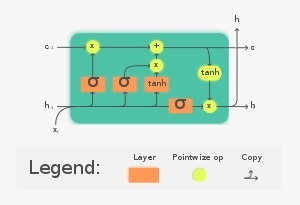

**1.Reading dataset**

In [ ]:
f = open("Alice.txt",'r')  
data = f.read()

**2.Tokenizing the words by making a dictionary (using fit_on_texts) where each unique word is associated with a number**

In [ ]:
tokenizer = Tokenizer()
corpus = data.lower().split(".")
for i in range(0,len(corpus)):
  s = re.sub(' +',' ',(re.sub(r'[^\w]', ' ', corpus[i])))
  corpus[i] = s
print(len(corpus))
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

1223


**3.Converting sentences to respected vector list (using the numbers got from previous step). Creating n-gram sequences as inputs for all input sentences.**

In [ ]:
input_sequences = []
for j in corpus:
 token_list = tokenizer.texts_to_sequences([j])[0]
 for i in range(1, len(token_list)):
  n_gram_sequence = token_list[:i+1]
  input_sequences.append(n_gram_sequence)

**4.Padding the input sequences to make it all of the same length. This will help the model learn better.**

In [ ]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

**5.Creating input data and output data from given sequences. Further converts output labels into a standardized binary matrix using keras.utils.to_categorical**

In [ ]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

**6.Building model using LSTM. Added dropout to prevent overfitting.**

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adam')
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 312, 100)          303800    
_________________________________________________________________
lstm_12 (LSTM)               (None, 312, 256)          365568    
_________________________________________________________________
dropout_11 (Dropout)         (None, 312, 256)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 3038)              780766    
Total params: 1,975,446
Trainable params: 1,975,446
Non-trainable params: 0
____________________________________________

**7.Checkpoints to save model every epoch the model does better.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

filepath = "/content/drive/MyDrive/Text-Generator/model_training.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss',
                             verbose=1, save_best_only=True,
                             mode='min')
early_stop = EarlyStopping(monitor='accuracy',
                           patience=7,
                           restore_best_weights=True,
                           mode='max')
callbacks = [checkpoint,early_stop]

**8.Training the model**

*IT TAKES AROUND 2 HRS TO TRAIN THE MODEL USING GPU. 

In [ ]:
history = model.fit(predictors, label, epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
921/921 [==============================] - 42s 43ms/step - loss: 6.4487 - accuracy: 0.0546

Epoch 00001: loss improved from inf to 6.21541, saving model to /content/drive/MyDrive/Text-Generator/model_training.hdf5
Epoch 2/100
921/921 [==============================] - 40s 43ms/step - loss: 5.8156 - accuracy: 0.0708

Epoch 00002: loss improved from 6.21541 to 5.79415, saving model to /content/drive/MyDrive/Text-Generator/model_training.hdf5
Epoch 3/100
921/921 [==============================] - 40s 43ms/step - loss: 5.4987 - accuracy: 0.0940

Epoch 00003: loss improved from 5.79415 to 5.46979, saving model to /content/drive/MyDrive/Text-Generator/model_training.hdf5
Epoch 4/100
921/921 [==============================] - 40s 43ms/step - loss: 5.2235 - accuracy: 0.1195

Epoch 00004: loss improved from 5.46979 to 5.21181, saving model to /content/drive/MyDrive/Text-Generator/model_training.hdf5
Epoch 5/100
921/921 [==============================] - 40s 43ms/step - loss: 4.9804 

**9.Saving final model**


In [ ]:
model.save("/content/drive/MyDrive/Text-Generator/model2.hdf5")

**10.Loading Pre-trained model**


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/Text-Generator/model2.hdf5')


**11. Example prediction of trained model.**

In [ ]:
seed_text = "we indeed cried"
next_words = 10
  
for _ in range(next_words):
 token_list = tokenizer.texts_to_sequences([seed_text])[0]
 token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 predicted = np.argmax(model.predict(token_list), axis=-1)
 output_word = ""
 for word, index in tokenizer.word_index.items():
  if index == predicted:
   output_word = word
   break
 seed_text += " " + output_word
print(seed_text)

we indeed cried the mouse who was trembling down to the end of


#TO GET BETTER RESULTS WE CAN USE A BIGGER CORPUS OR FINETUNE THE LSTM MODEL